In [1]:
#AAAAAAAAAAAAAAAA

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService  


In [3]:
service = QiskitRuntimeService(token=token, channel="ibm_quantum_platform")

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-07-27 21:53:39,541: Default instance not set. Searching all available instances.


In [4]:
print("Instanzen, auf die dein Token Zugriff hat:")
for inst in service.instances():
    print(" •", inst)


Instanzen, auf die dein Token Zugriff hat:
 • {'crn': 'crn:v1:bluemix:public:quantum-computing:us-east:a/c99e194d7d7d4a248aef3f80750b7c42:ba436f3b-d538-41a3-806b-228c04e4627e::', 'plan': 'open', 'name': 'Qiskit Quantum Kernels'}


In [5]:
# Notebook‑Zelle 4
backends = service.backends(
    simulator=False,     # nur echte Hardware
    operational=True     # nur aktuell verfügbare Systeme
)

print(f"{'Backend':15}  Qubits  Pending jobs")
print("-"*35)
for b in sorted(backends, key=lambda x: x.num_qubits):
    status = b.status()
    print(f"{b.name:15}  {b.num_qubits:>6}      {status.pending_jobs:>3}")

Backend          Qubits  Pending jobs
-----------------------------------
ibm_brisbane        127      500
ibm_sherbrooke      127      240
ibm_torino          133      166


In [6]:
#binary
0b101010

42

In [7]:
def bin_hom(x,zf=8):
    if(type(x)==type("test")):
        if(x[1]=='b'):
            i=x[2:]
        else:
            i=x
    else:
        i=bin(x)[2:]
    lst = []
    i=i.zfill(zf)
    for c in i:
        if(c=='0'):
            lst.append(0)
        elif(c=='1'):
            lst.append(1)
        else:
            print("unpure binary string!\n")
            break
    return lst
            

In [8]:
l=bin_hom(1000)


In [9]:
import numpy as np

In [10]:
np.binary_repr(13,4)#13 with 4 bits

'1101'

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService


In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

# Liste alle Hardware-Backends (keine Simulatoren), die derzeit operational sind
backends = service.backends(simulator=False, operational=True)
for backend in backends:
    print(f"{backend.name} - Qubits: {backend.num_qubits} - Pending Jobs: {backend.status().pending_jobs}")


ibm_brisbane - Qubits: 127 - Pending Jobs: 500
ibm_sherbrooke - Qubits: 127 - Pending Jobs: 240
ibm_torino - Qubits: 133 - Pending Jobs: 166


In [13]:
# 1. Notwendige Bibliotheken importieren
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# 2. Einen Quantenschaltkreis erstellen
#    Wir erstellen einen Schaltkreis mit 2 Qubits und 2 klassischen Bits
qc = QuantumCircuit(2, 2)

#    Hadamard-Gatter auf das erste Qubit anwenden -> erzeugt Superposition
qc.h(0)

#    CNOT-Gatter anwenden -> erzeugt Verschränkung
qc.cx(0, 1)

#    Die Qubits messen und die Ergebnisse in den klassischen Bits speichern
qc.measure([0, 1], [0, 1])

#    Den Schaltkreis ausgeben (optional)
print("Dein Quantenschaltkreis:")
print(qc)

# 3. Den lokalen Simulator auswählen
#    AerSimulator ist der leistungsstarke lokale Simulator von Qiskit
simulator = AerSimulator()

# 4. Den Schaltkreis auf dem Simulator ausführen
#    'shots' gibt an, wie oft der Schaltkreis ausgeführt werden soll
job = simulator.run(qc, shots=1024)

# 5. Ergebnisse abrufen
result = job.result()
counts = result.get_counts(qc)

print("\nSimulationsergebnisse (Counts):")
print(counts)

Dein Quantenschaltkreis:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Simulationsergebnisse (Counts):
{'11': 507, '00': 517}


In [14]:
import numpy as np
import sympy as sp

In [15]:
ket_0 = np.array([[1],[0]])
ket_1 = np.array([[0],[1]])
sp.Matrix(ket_0)


Matrix([
[1],
[0]])

In [16]:
sp.Matrix(ket_1)

Matrix([
[0],
[1]])

In [17]:
np.sqrt(np.sum(ket_0**2))

np.float64(1.0)

In [18]:
ones = np.array([[1],[1]])
np.sqrt(np.sum(ones**2))

np.float64(1.4142135623730951)

In [19]:
np.vdot(ket_0,ket_0)

np.int64(1)

In [20]:
ket_01=np.kron(ket_0,ket_1)
sp.Matrix(ket_01)

Matrix([
[0],
[1],
[0],
[0]])

In [21]:
p1 = np.array([[0.25],[0.75]])
sp.Matrix(p1)

Matrix([
[0.25],
[0.75]])

In [22]:
samples = np.random.choice([0,1],size=100,p=p1.reshape(-1))

In [23]:
np.count_nonzero(samples == 0)

np.int64(27)

# Density Matrices

In [24]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex

In [25]:
psi = qi.Statevector([0,1,0,0])
psi.draw('latex')

<IPython.core.display.Latex object>

In [26]:
qc = QuantumCircuit(2)#2 qubits
qc.h(1)
qc.cx(1,0)
qc.draw(reverse_bits=True)

┌───┐     
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_0: ─────┤ X ├
          └───┘

In [29]:
psi_1 = psi.evolve(qc)
psi_1.draw("latex")

<IPython.core.display.Latex object>

In [30]:

rho_1 = qi.DensityMatrix(psi_1)
rho_1.draw("latex")

<IPython.core.display.Latex object>

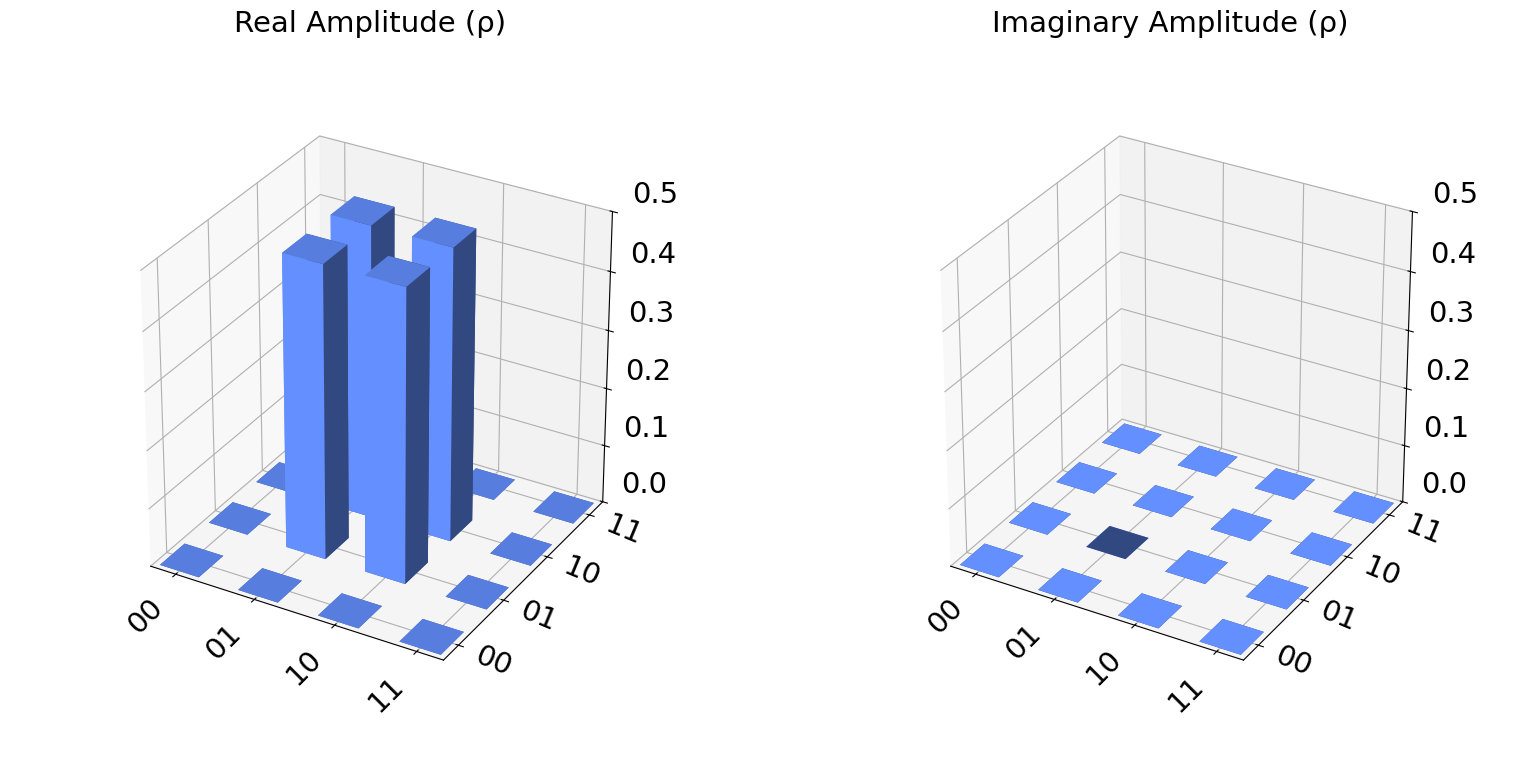

In [31]:
rho_1.draw("city")

In [36]:
rho_2 = qi.DensityMatrix.from_label('r')#use predefined states
rho_2.draw("latex")

<IPython.core.display.Latex object>

### S GATE

In [37]:
s = qi.Operator.from_label("S")
array_to_latex(s)

<IPython.core.display.Latex object>

In [38]:
rho_3 = rho_2.evolve(s)
rho_3.draw("latex")

<IPython.core.display.Latex object>

In [39]:
rho_4 = 1/3 * qi.DensityMatrix.from_label("1") + 2/3*qi.DensityMatrix.from_label("0")
rho_4.draw("latex")

<IPython.core.display.Latex object>

In [43]:
rho_4.evolve(qi.Operator.from_label("X")).draw("latex")

<IPython.core.display.Latex object>

# Noisy Gates

In [48]:
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, mixed_unitary_error

In [50]:
l = qi.DensityMatrix.from_label("l")
r = qi.DensityMatrix.from_label("r")
p = qi.DensityMatrix.from_label("+")


rho = 8/10*r + 1/10*l + 1/10*p
rho.draw("latex")

<IPython.core.display.Latex object>

In [51]:
s = qi.Operator.from_label("S")

In [53]:
s_dagger = s.adjoint()

In [54]:
I = qi.Operator.from_label("I")

In [55]:
prob_s = 0.8
prob_s_dagger = 0.1
prob_I = 0.1

In [56]:
S_noisy = mixed_unitary_error([(s,prob_s),(s_dagger,prob_s_dagger),(I,prob_I)])

In [57]:
print(S_noisy)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8, Circuit = 
   ┌─────────┐
q: ┤ Unitary ├
   └─────────┘
  P(1) = 0.1, Circuit = 
   ┌─────────┐
q: ┤ Unitary ├
   └─────────┘
  P(2) = 0.1, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [59]:
noise_m = NoiseModel()
noise_m.add_quantum_error(S_noisy,["id"],[0])#what gate on what qubit
print(noise_m)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  Qubits with noise: [0]
  Specific qubit errors: [('id', (0,))]


In [60]:
qc = QuantumCircuit(1)
qc.h(0)
qc.id(0)
qc.save_density_matrix()
qc.draw()

┌───┐┌───┐ density_matrix 
q: ┤ H ├┤ I ├───────░────────
   └───┘└───┘       ░

In [75]:
# 1) Build a simple noise model (example)
noise_m = NoiseModel()
#    • add kraus / unitary / pauli errors here …
#      e.g. noise_m.add_all_qubit_quantum_error(mixed_unitary_error([...]), 'cx')

# 2) Build or load the circuit you want to run
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
# 3) Create a simulator that can track density matrices and apply the noise model
sim_density = AerSimulator(
    method="density_matrix",   # or "automatic" / "stabilizer" / "matrix_product_state" …
    noise_model=noise_m        # <-- correct keyword!
)

# 4) Run and get results
job    = sim_density.run(qc)
qc.save_density_matrix() 
result = job.result()
print(result.get_counts())

{'00': 507, '11': 517}


In [73]:
rho_s = result.data(0)["density_matrix"]
rho_s = qi.DensityMatrix(rho_s)
rho_s.draw("latex")

<IPython.core.display.Latex object>

# Cut, Versuch 2

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [4]:
service = QiskitRuntimeService()  # verwendet den gespeicherten Account
backends = service.backends(simulator=False, operational=True)
for b in backends:
    print(b.name, b.num_qubits)

ibm_brisbane 127
ibm_sherbrooke 127
ibm_torino 133


In [10]:
from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager

backend = service.least_busy(simulator=False, operational=True)
print("Ausgewähltes Backend:", backend.name)

# Beispiel: einfache Bell-Schaltung
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# preset pass manager der höchsten Stufe (3) für dein Backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc)

Ausgewähltes Backend: ibm_sherbrooke


In [15]:
# -------------------------------------------
# 0) Imports & Service
# -------------------------------------------
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp

service  = QiskitRuntimeService()
backend  = service.least_busy(simulator=False, operational=True)
print("Backend:", backend.name)

# -------------------------------------------
# 1) Testschaltung (Bell, 2 Logik-Qubits)
# -------------------------------------------
qc = QuantumCircuit(2, name="Bell")
qc.h(0)
qc.cx(0, 1)

# -------------------------------------------
# 2) Auf Backend transpilierten ISA-Circuit erzeugen
#    → Transpiler sorgt für gültige Basisgatter
#    → Layout hält die Anzahl „2“, weist sie nur
#      auf zwei physische Qubits des Geräts ab.
# -------------------------------------------
isa_circuit = transpile(
    qc,
    backend=backend,
    optimization_level=1       # schnell, genügt für Demo
)
print("Logische Qubits nach Transpile:", isa_circuit.num_qubits)

# -------------------------------------------
# 3) Observables an Layout anpassen
# -------------------------------------------
observables_logical = [
    SparsePauliOp("ZZ"),
    SparsePauliOp("XX")
]

# physisches Layout anwenden, damit Dim-Check passt
layout = isa_circuit.layout
observables_physical = [
    obs.apply_layout(layout) for obs in observables_logical
]

# -------------------------------------------
# 4) Erwartungswerte mit Estimator (100 Shots)
# -------------------------------------------
est = Estimator(mode=backend)
est.options.default_shots = 100

job_est = est.run([(isa_circuit, observables_physical)])

# -------------------------------------------
# 5) Roh-Counts mit Sampler (100 Shots)
# -------------------------------------------
sampler = Sampler(mode=backend)
job_samp = sampler.run([isa_circuit], shots=100)


Backend: ibm_sherbrooke
Logische Qubits nach Transpile: 127


/home/lab/qiskit_main/lib/python3.13/site-packages/qiskit_ibm_runtime/utils/validations.py:41: UserWarning: The 0-th circuit has no output classical registers so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(


In [21]:
job_samp 

<RuntimeJobV2('d25s2t023tks73a6kpug', 'sampler')>